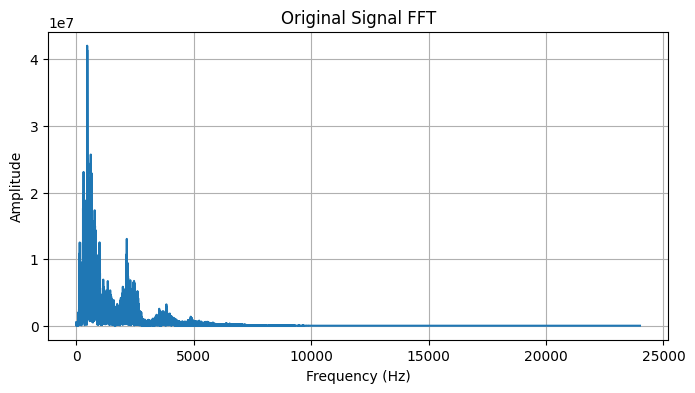

In [8]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Load the audio file
fs, data = wavfile.read('Lab_01.wav')

# Function to plot FFT spectrum
def plot_fft(signal, fs, title):
    n = len(signal)
    freq = np.fft.fftfreq(n, d=1/fs)
    magnitude = np.abs(np.fft.fft(signal))
    plt.figure(figsize=(8, 4))
    plt.plot(freq[:n//2], magnitude[:n//2])
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.title(title)
    plt.grid(True)
    plt.show()


# FFT for original signal
plot_fft(data, fs, 'Original Signal FFT')


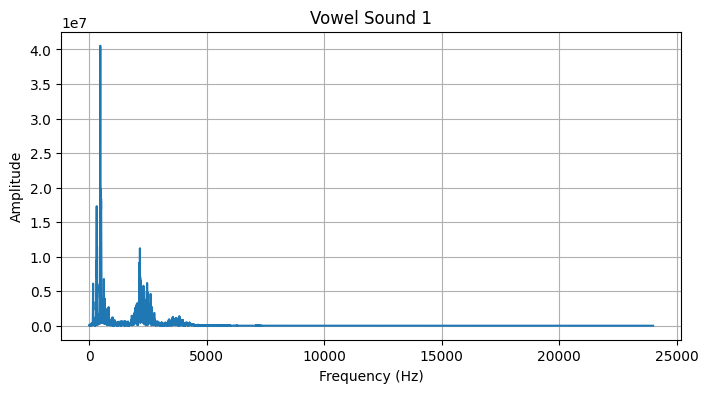

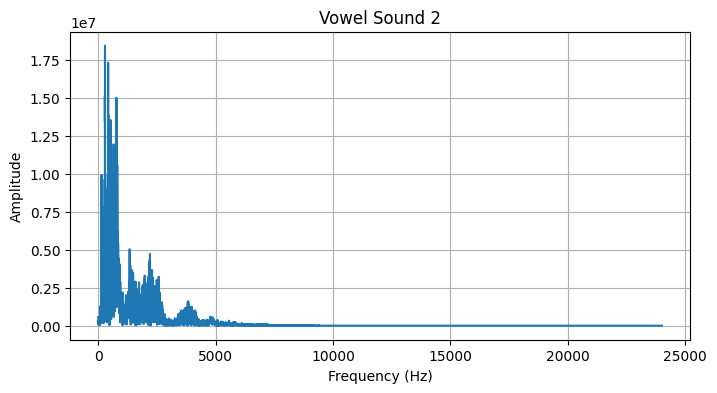

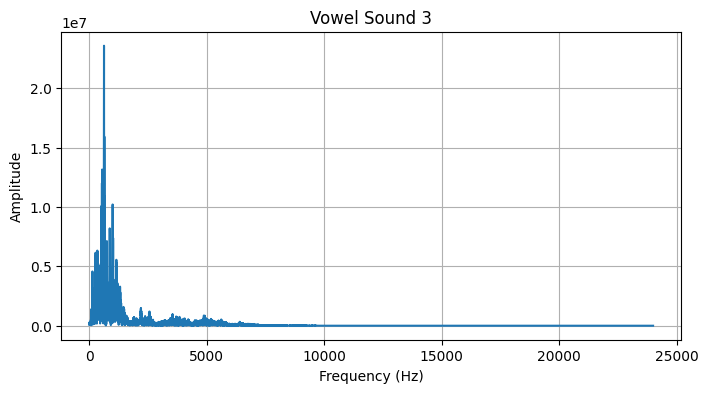

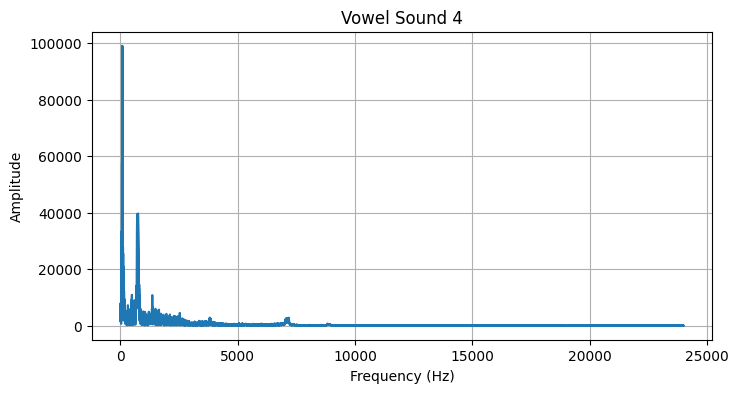

In [4]:

# A1. FFT for vowel sounds
vowel_samples = [slice(start, start + fs) for start in range(0, len(data), fs)]
for idx, sample in enumerate(vowel_samples):
    plot_fft(data[sample], fs, f'Vowel Sound {idx + 1}')


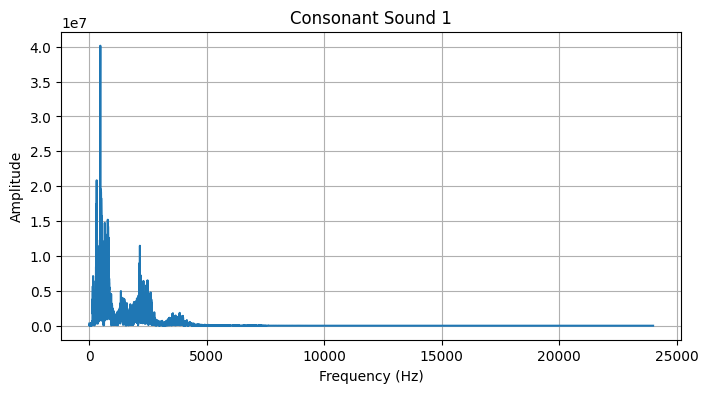

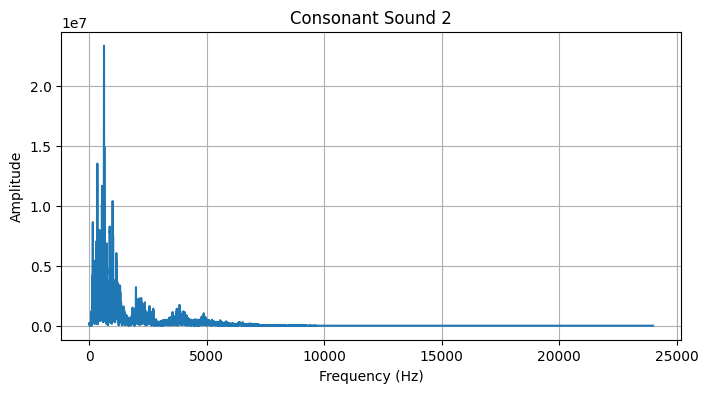

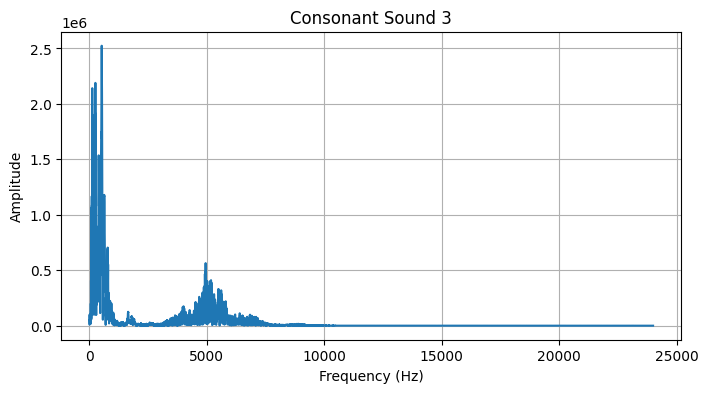

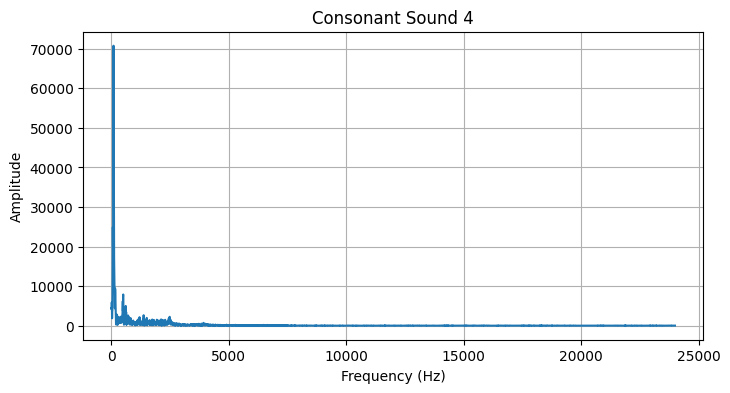

In [5]:

# A2. FFT for consonant sounds
consonant_samples = [slice(start, start + fs) for start in range(fs//2, len(data), fs)]
for idx, sample in enumerate(consonant_samples):
    plot_fft(data[sample], fs, f'Consonant Sound {idx + 1}')



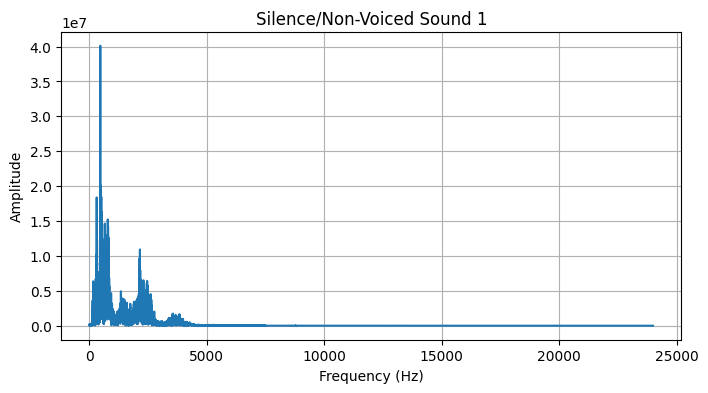

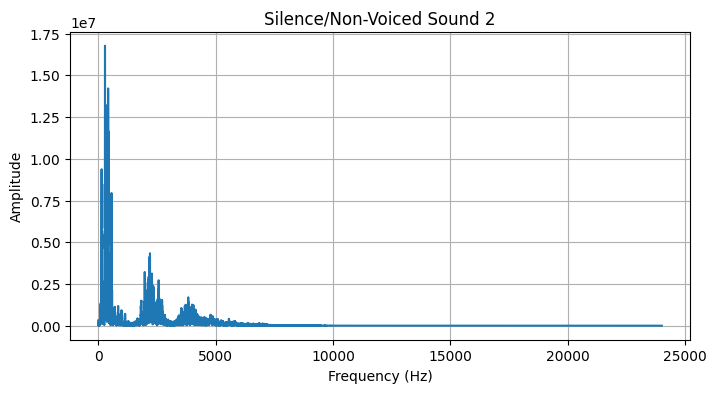

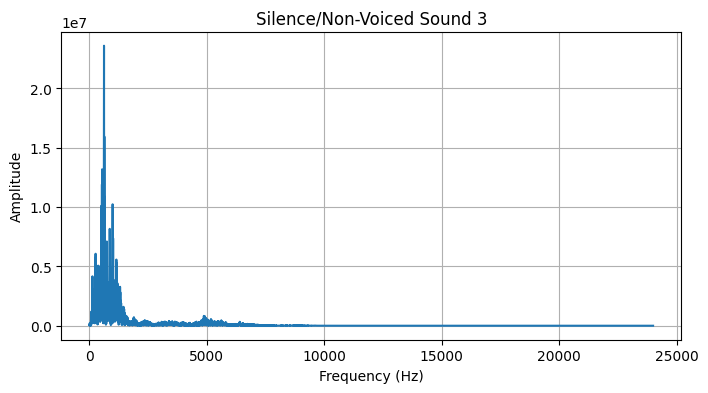

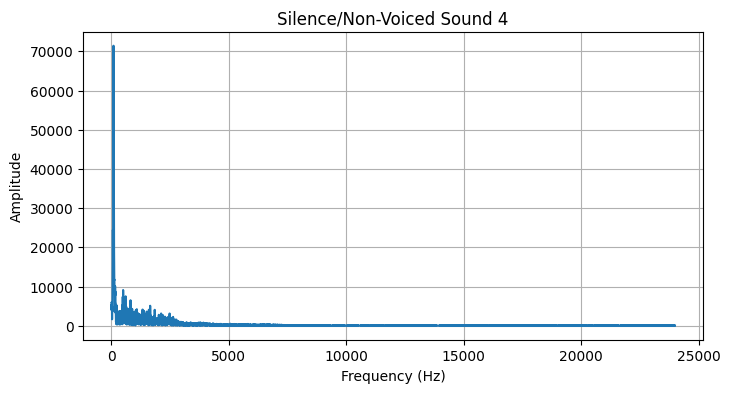

In [6]:

# A3. FFT for silence & non-voiced portions
silence_samples = [slice(start, start + fs) for start in range(fs//4, len(data), fs)]
for idx, sample in enumerate(silence_samples):
    plot_fft(data[sample], fs, f'Silence/Non-Voiced Sound {idx + 1}')


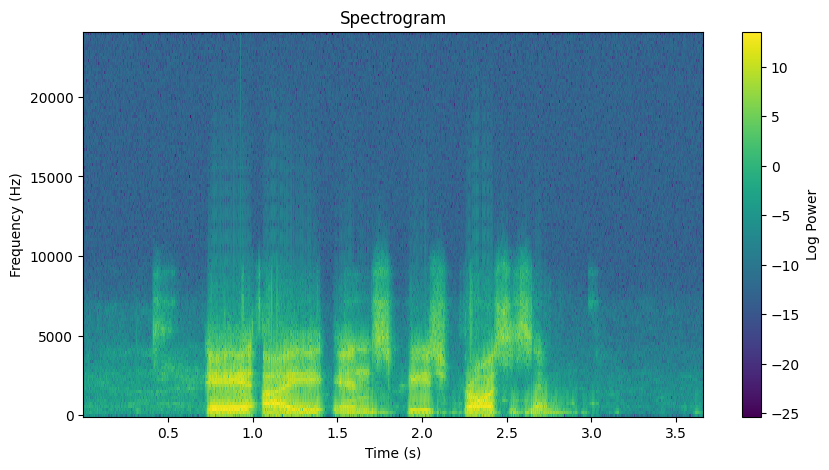

In [7]:

# A4. Spectrogram
frequencies, times, spectrogram = signal.spectrogram(data, fs)
plt.figure(figsize=(10, 5))
plt.pcolormesh(times, frequencies, np.log(spectrogram))
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.title('Spectrogram')
plt.colorbar(label='Log Power')
plt.show()

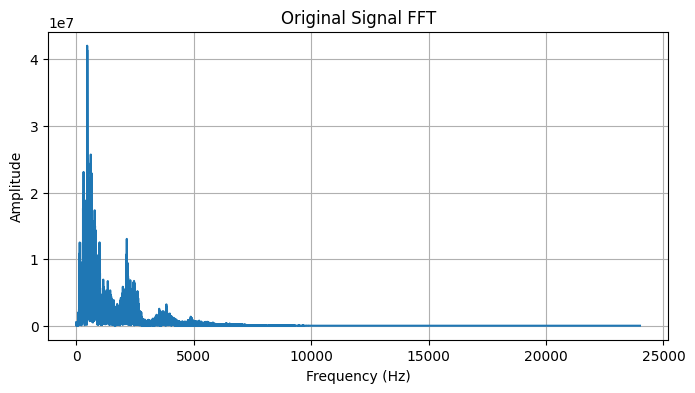

In [9]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
from scipy.io import wavfile
import IPython.display as ip

# Load the audio file
fs, data = wavfile.read('Lab_01.wav')

# Function to plot FFT spectrum
def plot_fft(signal, fs, title):
    n = len(signal)
    freq = np.fft.fftfreq(n, d=1/fs)
    magnitude = np.abs(np.fft.fft(signal))
    plt.figure(figsize=(8, 4))
    plt.plot(freq[:n//2], magnitude[:n//2])
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.title(title)
    plt.grid(True)
    plt.show()

# FFT for original signal
plot_fft(data, fs, 'Original Signal FFT')

# Function to perform iFFT and play audio
def play_audio(segment, rate):
    signal_ifft = np.fft.ifft(segment)
    ip.display(ip.Audio(signal_ifft.real, rate=rate))

# A1. FFT and iFFT for vowel sounds
vowel_samples = [slice(start, start + fs) for start in range(0, len(data), fs)]
for idx, sample in enumerate(vowel_samples):
    fft_result = np.fft.fft(data[sample])
    play_audio(fft_result, fs)

# A2. FFT and iFFT for consonant sounds
consonant_samples = [slice(start, start + fs) for start in range(fs//2, len(data), fs)]
for idx, sample in enumerate(consonant_samples):
    fft_result = np.fft.fft(data[sample])
    play_audio(fft_result, fs)

# A3. FFT and iFFT for silence & non-voiced portions
silence_samples = [slice(start, start + fs) for start in range(fs//4, len(data), fs)]
for idx, sample in enumerate(silence_samples):
    fft_result = np.fft.fft(data[sample])
    play_audio(fft_result, fs)

# A4. FFT and iFFT for spectrogram
frequencies, times, spectrogram = signal.spectrogram(data, fs)
fft_result = np.fft.fft(spectrogram)
play_audio(fft_result, fs)
